<a href="https://colab.research.google.com/github/AnandMasurkar/IEEE_Fraud_Detection/blob/master/Fraud_Detection_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IEEE FRAUD DETECTION KAGGLE

## Import Dependencies

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import gc

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Train Test Split
from sklearn.model_selection import train_test_split

from sklearn import linear_model,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive"

Mounted at /content/drive
/content/drive/My Drive


In [0]:
train_identity = pd.read_csv('train_identity.csv')
print('The training dataset for identity information has {0} rows and {1} columns'.format(*train_identity.shape))

train_transaction = pd.read_csv('train_transaction.csv')
print('The training dataset for transactions has {0} rows and {1} columns'.format(*train_transaction.shape))

The training dataset for identity information has 144233 rows and 41 columns
The training dataset for transactions has 590540 rows and 394 columns


In [0]:
test_identity = pd.read_csv('test_identity.csv')
print('The test dataset for identity information has {0} rows and {1} columns'.format(*test_identity.shape))

test_transaction = pd.read_csv('test_transaction.csv')
print('The test dataset for identity information has {0} rows and {1} columns'.format(*test_transaction.shape))

The test dataset for identity information has 141907 rows and 41 columns
The test dataset for identity information has 506691 rows and 393 columns


In [0]:
train_idNA = train_identity.isnull().sum()
print('========================Identity========================')
print('----------Columns with no missing values----------')
print(*train_idNA[train_idNA == 0].index, sep='\t')
print('----------Columns with missing values-------------')
print(*train_idNA[train_idNA > 0].index, sep='\t')

train_txnNA = train_transaction.isnull().sum()
print('\n========================transactions====================')
print('----------Columns with no missing values----------')
print(*train_txnNA[train_txnNA == 0].index, sep='\t')
print('----------Columns with missing values-------------')
print(*train_txnNA[train_txnNA > 0].index, sep='\t')

========================Identity========================
----------Columns with no missing values----------
TransactionID	id_01	id_12
----------Columns with missing values-------------
id_02	id_03	id_04	id_05	id_06	id_07	id_08	id_09	id_10	id_11	id_13	id_14	id_15	id_16	id_17	id_18	id_19	id_20	id_21	id_22	id_23	id_24	id_25	id_26	id_27	id_28	id_29	id_30	id_31	id_32	id_33	id_34	id_35	id_36	id_37	id_38	DeviceType	DeviceInfo

========================transactions====================
----------Columns with no missing values----------
TransactionID	isFraud	TransactionDT	TransactionAmt	ProductCD	card1	C1	C2	C3	C4	C5	C6	C7	C8	C9	C10	C11	C12	C13	C14
----------Columns with missing values-------------
card2	card3	card4	card5	card6	addr1	addr2	dist1	dist2	P_emaildomain	R_emaildomain	D1	D2	D3	D4	D5	D6	D7	D8	D9	D10	D11	D12	D13	D14	D15	M1	M2	M3	M4	M5	M6	M7	M8	M9	V1	V2	V3	V4	V5	V6	V7	V8	V9	V10	V11	V12	V13	V14	V15	V16	V17	V18	V19	V20	V21	V22	V23	V24	V25	V26	V27	V28	V29	V30	V31	V32	V33	V34	V35	V36	V37	V38	

In [0]:
test_idNA = test_identity.isnull().sum()
print('========================Identity========================')
print('----------Columns with no missing values----------')
print(*test_idNA[test_idNA == 0].index, sep='\t')
print('----------Columns with missing values-------------')
print(*test_idNA[test_idNA > 0].index, sep='\t')

test_txnNA = test_transaction.isnull().sum()
print('\n========================transactions====================')
print('----------Columns with no missing values----------')
print(*test_txnNA[test_txnNA == 0].index, sep='\t')
print('----------Columns with missing values-------------')
print(*test_txnNA[test_txnNA > 0].index, sep='\t')

========================Identity========================
----------Columns with no missing values----------
TransactionID	id_01	id_12
----------Columns with missing values-------------
id_02	id_03	id_04	id_05	id_06	id_07	id_08	id_09	id_10	id_11	id_13	id_14	id_15	id_16	id_17	id_18	id_19	id_20	id_21	id_22	id_23	id_24	id_25	id_26	id_27	id_28	id_29	id_30	id_31	id_32	id_33	id_34	id_35	id_36	id_37	id_38	DeviceType	DeviceInfo

========================transactions====================
----------Columns with no missing values----------
TransactionID	TransactionDT	TransactionAmt	ProductCD	card1	V95	V96	V97	V98	V99	V100	V101	V102	V103	V104	V105	V106	V107	V108	V109	V110	V111	V112	V113	V114	V115	V116	V117	V118	V119	V120	V121	V122	V123	V124	V125	V126	V127	V128	V129	V130	V131	V132	V133	V134	V135	V136	V137
----------Columns with missing values-------------
card2	card3	card4	card5	card6	addr1	addr2	dist1	dist2	P_emaildomain	R_emaildomain	C1	C2	C3	C4	C5	C6	C7	C8	C9	C10	C11	C12	C13	C14	D1	D2	D3	D4	D5	D6	D

# Single Train and Test from identity and transaction 
1. Merging identity and transaction train 
2. Merging identity and transaction test

In [0]:
train_identity.shape

(144233, 41)

In [0]:
train_transaction.shape

(590540, 394)

In [0]:
test_identity.shape

(141907, 41)

In [0]:
test_transaction.shape

(506691, 393)

### Merging 

In [0]:
train= pd.merge(train_transaction,train_identity, on='TransactionID', how='left')
train.shape

(590540, 434)

In [0]:
test = pd.merge(test_transaction,test_identity,on='TransactionID',how='left')
test.shape

(506691, 433)

## Check for columns which are completely null

In [0]:
contains_list_null_columns = train.isnull().mean().tolist()

In [0]:
contains_list_null_columns

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.015126833068039422,
 0.0026501168422122124,
 0.00267043722694483,
 0.007212043214684865,
 0.0026602770345785214,
 0.1112642666034477,
 0.1112642666034477,
 0.596523520845328,
 0.9362837403054831,
 0.1599485216920107,
 0.7675161716395164,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0021488806854743116,
 0.4754919226470688,
 0.44514850814508755,
 0.2860466691502693,
 0.524674027161581,
 0.8760676668811597,
 0.9340992989467267,
 0.8731229044603245,
 0.8731229044603245,
 0.1287330240119213,
 0.47293494090154775,
 0.8904104717715988,
 0.8950926270870728,
 0.8946946862193924,
 0.1509008703898127,
 0.4590713584177194,
 0.4590713584177194,
 0.4590713584177194,
 0.47658753005723575,
 0.5934940901547736,
 0.28678836319300977,
 0.5863531682866528,
 0.5863311545365258,
 0.5863311545365258,
 0.47293494090154775,
 0.47293494090154775,
 0.47293494090154775,
 0.47293494090154775,
 0.47293494090154775,
 0.4729349409015477

In [0]:
#contains_list_null_columns.index(1)

Therefore as there is no mean value as 1 in any column.
No column is entirely null

## Now check for rows containing null values

In [0]:
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
                   ...  
id_11             449562
id_12             446307
id_13             463220
id_14             510496
id_15             449555
id_16             461200
id_17             451171
id_18             545427
id_19             451222


In [0]:
df = train.loc[:, train.isnull().mean() < .01]

In [0]:
df.shape

(590540, 111)

In [0]:
df.isnull().sum()

TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
card3             1565
card4             1577
card5             4259
card6             1571
C1                   0
C2                   0
C3                   0
C4                   0
C5                   0
C6                   0
C7                   0
C8                   0
C9                   0
C10                  0
C11                  0
C12                  0
C13                  0
C14                  0
D1                1269
V95                314
V96                314
V97                314
V98                314
V99                314
                  ... 
V292                12
V293                12
V294                12
V295                12
V296              1269
V297                12
V298                12
V299                12
V300              1269
V301              1269
V302                12
V303                12
V304       

In [0]:
x_df = df.dropna()

In [0]:
x_df.columns.tolist()

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card3',
 'card4',
 'card5',
 'card6',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V279',
 'V280',
 'V281',
 'V282',
 'V283',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',

In [0]:
test.isnull().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8654
card3               3002
card4               3086
card5               4547
card6               3007
addr1              65609
addr2              65609
dist1             291217
dist2             470255
P_emaildomain      69192
R_emaildomain     370821
C1                     3
C2                     3
C3                     3
C4                     3
C5                     3
C6                     3
C7                     3
C8                     3
C9                     3
C10                    3
C11                    3
C12                    3
C13                 4748
C14                    3
                   ...  
id_11             369913
id_12             364784
id_13             376405
id_14             435334
id_15             369714
id_16             380944
id_17             370725
id_18             455816
id_19             370785


In [0]:
is_fraud_df = x_df['isFraud']

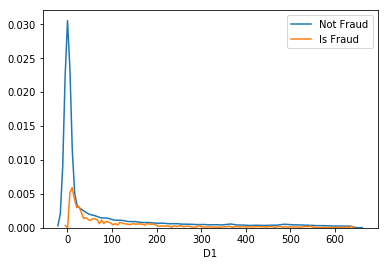

In [0]:
sns.distplot(x_df['D1'][x_df['isFraud'] == 0], label = 'Not Fraud', hist = False,)
sns.distplot(x_df['D1'][x_df['isFraud'] == 1], label = 'Is Fraud', hist = False)

In [0]:
x_df = x_df.drop(['isFraud'],axis=1)

In [0]:
x_df.shape

(584843, 110)

In [0]:
test_df = test[x_df.columns]

In [0]:
test_df.shape

(506691, 110)

In [0]:
test_df = test_df.dropna()

In [0]:
test_df.shape

(493006, 110)

In [0]:
test_df.isnull().sum()

TransactionID     0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card3             0
card4             0
card5             0
card6             0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
V95               0
V96               0
V97               0
V98               0
V99               0
V100              0
                 ..
V292              0
V293              0
V294              0
V295              0
V296              0
V297              0
V298              0
V299              0
V300              0
V301              0
V302              0
V303              0
V304              0
V305              0
V306              0
V307              0
V308              0
V309              0
V310              0


### Summary till now
1. Now Until this point we have x_df with all train values except isFraud column
2. is_fraud_df 
3. test_df with all testing values 
4. all columns are same in x_df and test_df and both includes Transaction ID 

### Histogram

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


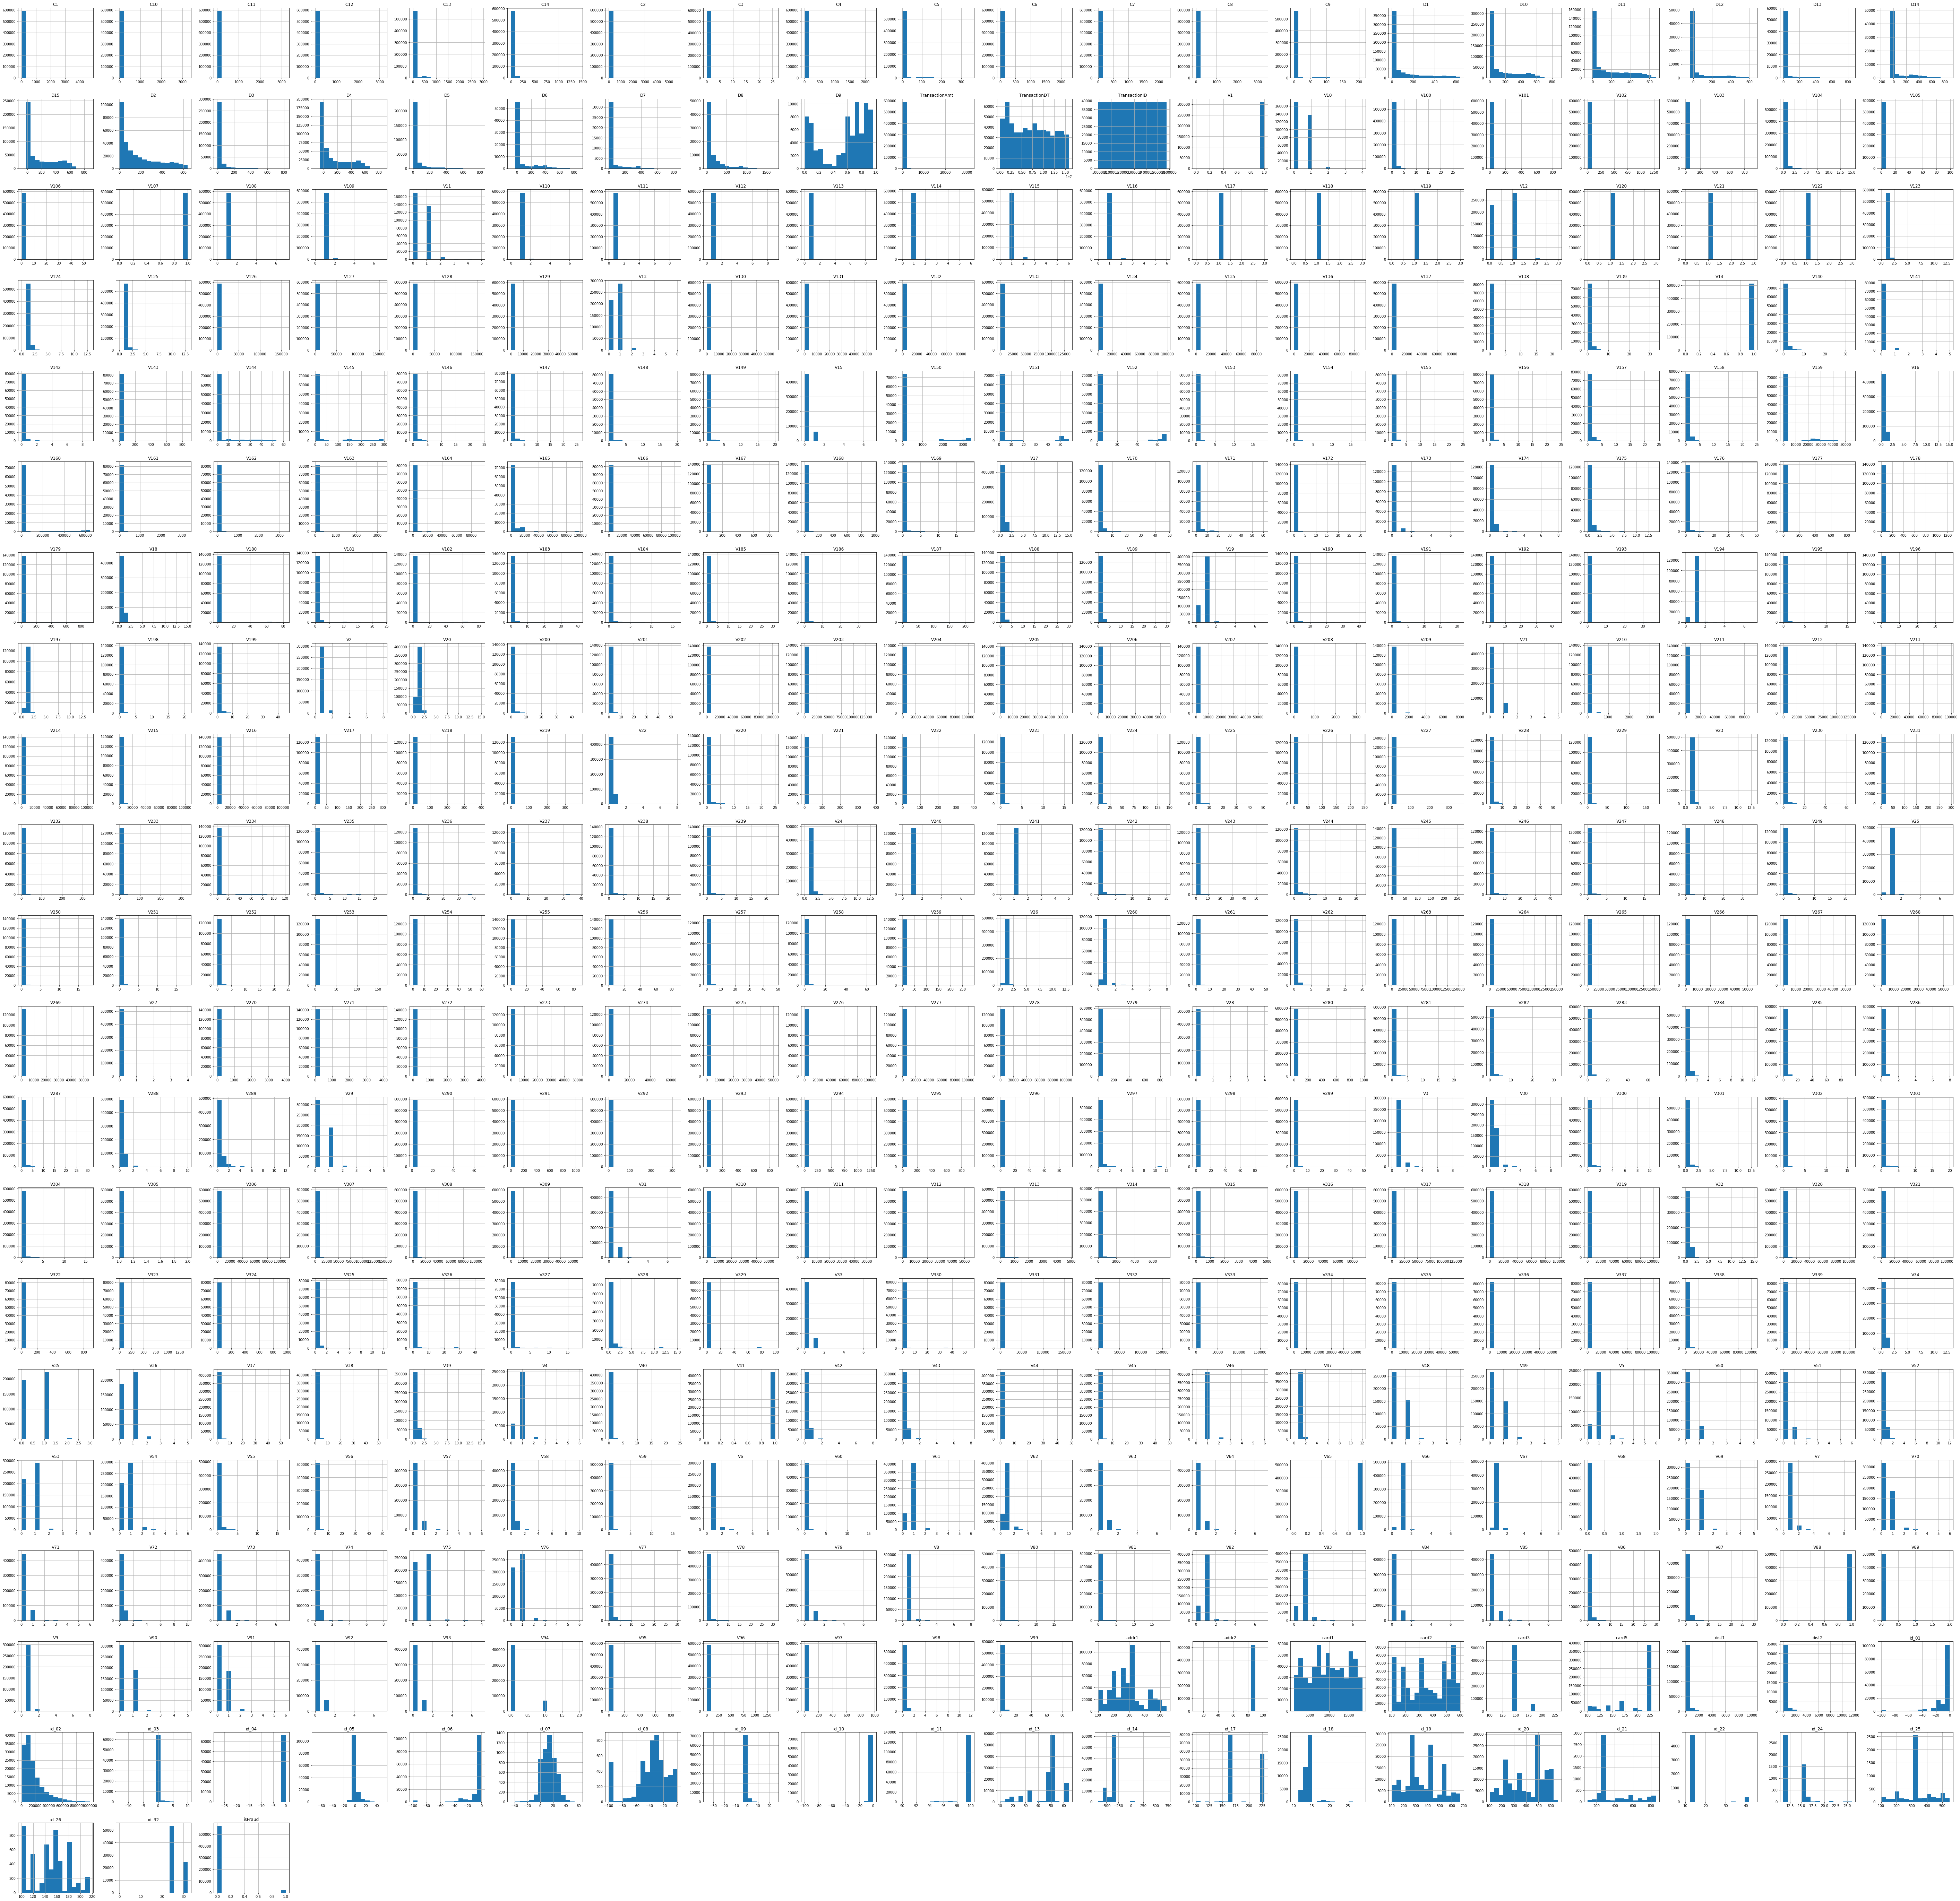

In [0]:
fig = plt.figure(figsize = (100,100))
ax = fig.gca()
train.hist(ax = ax, bins = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


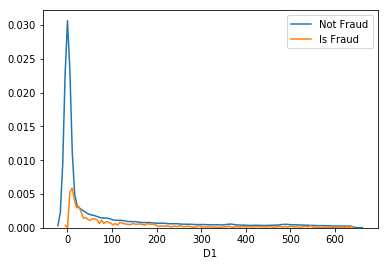

In [0]:
sns.distplot(train['D1'][train['isFraud'] == 0], label = 'Not Fraud', hist = False,)
sns.distplot(train['D1'][train['isFraud'] == 1], label = 'Is Fraud', hist = False)

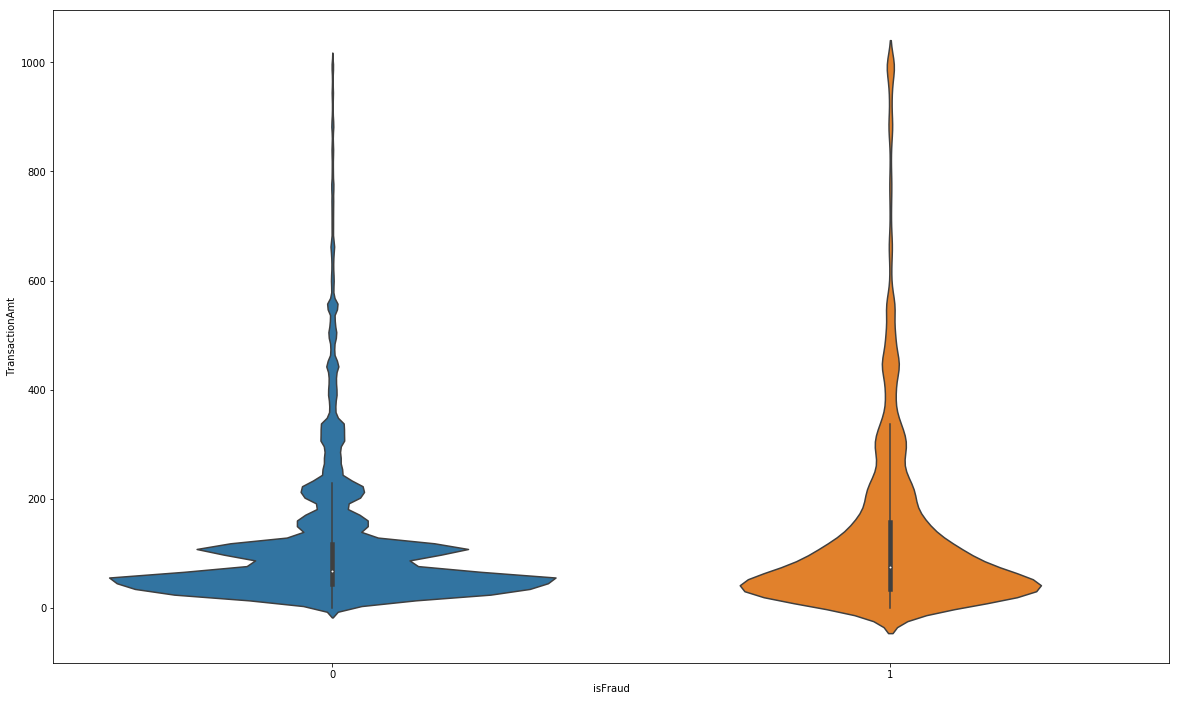

In [0]:
fig, ax = plt.subplots(figsize=(20, 12))
plot= sns.violinplot(x = train['isFraud'][train['TransactionAmt'] < 1000], y = train['TransactionAmt'][train['TransactionAmt'] < 1000].astype('float32'))

## Make copy of column TransactionID

In [0]:
transaction_id_column_x_df = x_df['TransactionID'] 
transaction_id_column_test_df = test_df['TransactionID']

## One Hot encode for categorical features and normalization on numerical features
Categorical columns
Categorical Features - Transaction
ProductCD
card1 - card6
addr1, addr2
P_emaildomain
R_emaildomain
M1 - M9
Categorical Features - Identity
DeviceType
DeviceInfo
id_12 - id_38

In [0]:
x_df = x_df.drop('TransactionDT',axis=1)
test_df = test_df.drop('TransactionDT',axis=1)


In [0]:
x_df = x_df.drop('TransactionID',axis=1)
test_df = test_df.drop('TransactionID',axis=1)

In [0]:
x_df = x_df.drop('card1',axis=1)
test_df = test_df.drop('card1',axis=1)

In [0]:
x_df = x_df.drop('card3',axis=1)
test_df = test_df.drop('card3',axis=1)

In [0]:
x_df = x_df.drop('card4',axis=1)
test_df = test_df.drop('card4',axis=1)

In [0]:
column_names = x_df.columns.tolist()

In [0]:
len(column_names)

105

In [0]:
column_names1 = test_df.columns.tolist()

In [0]:
len(column_names1)

105

In [0]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
    df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)


In [0]:
for x in ['TransactionAmt','C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115',
 'V116', 'V117','V118', 'V119', 'V120', 'V121', 'V122', 'V123','V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130','V131', 'V132','V133', 'V134', 'V135', 'V136', 'V137', 'V279',
 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312','V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']:
  normalize_numeric_minmax(x_df,x)

In [0]:
for x in ['TransactionAmt','C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115',
 'V116', 'V117','V118', 'V119', 'V120', 'V121', 'V122', 'V123','V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130','V131', 'V132','V133', 'V134', 'V135', 'V136', 'V137', 'V279',
 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312','V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']:
  normalize_numeric_minmax(test_df,x)

In [0]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [0]:
#,"card1","card3","card4"
mylist = ["ProductCD","card5","card6"]
for i in mylist:
    encode_text_dummy(x_df,i)

In [0]:
# ,"card1","card3","card4"
mylist1 = ["ProductCD","card5","card6"]
for i in mylist1:
    encode_text_dummy(test_df,i)

In [0]:
is_fraud_df.dtype

dtype('int64')

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x_df,is_fraud_df, test_size=0.3,random_state=42)

In [0]:
type(y_train)
print(utils.multiclass.type_of_target(y_train))

binary


# LOGISTIC REGRESSION

In [0]:
logreg = linear_model.LogisticRegression()

In [0]:
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_logistic = logreg.predict(x_test)

In [0]:
# Explained f1 score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_logistic,average='micro'))

Evaluating with F1 score metric: 0.97


In [0]:
score = metrics.accuracy_score(y_test, y_pred_logistic)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9654323380050498


In [0]:
score = metrics.precision_score(y_test,y_pred_logistic, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9565399096314929


In [0]:
score = metrics.recall_score(y_test,y_pred_logistic, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9654323380050498


In [0]:
names = (np.unique(is_fraud_df.values))

In [0]:

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

[[169117    117]
 [  5948    271]]
Plotting confusion matrix


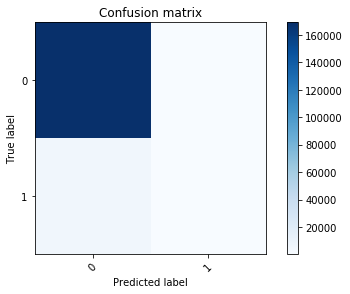

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    169234
           1       0.70      0.04      0.08      6219

    accuracy                           0.97    175453
   macro avg       0.83      0.52      0.53    175453
weighted avg       0.96      0.97      0.95    175453



In [0]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
print(cm)

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, y_pred_logistic))

Confusion matrix shows how fraud records are classified and how many of them are correctly classified.

Even if we could see accuracy of approximately 97% . Percentage of records which are actually fraud and is predicted fraud is approx 69%. 

Even when we are focused on detecting fraud records identifying non fraud records. Percentage of records correctly classified is approx 96%